In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from cycler import cycler

%matplotlib inline

In [186]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#333333', '#006699', 'mediumaquamarine', '#00B28D', '#CCC614', '#993D3D']),
    'axes.facecolor': 'whitesmoke',
    'figure.facecolor': 'whitesmoke',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'font.family': 'sans',
    'font.sans-serif': 'Din Alternate',
    'axes.titlesize': 'x-large',
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 4.0,
    'legend.frameon' : False
})

In [3]:
df = pd.read_csv('LMOP_All_Landfills.csv')
df.head()

,objectid,category,ghgrp_id,landfill_name,county_state,landfill_owner_org,year_landfill_opened,landfill_closure_year,current_landfill_status,landfill_design_cap,waste_in_place_tons,waste_in_place_year,lfg_collection_system,lfg_collected_mmscfd,lfg_collected_year,latitude,longitude
0,1,With Project,1007341.0,Anchorage Regional Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1987.0,2043.0,Open,27104639.0,9124649.0,2016.0,Yes,2.95,2013.0,61.293281,-149.602138
1,2,Other,1010389.0,Capitol Disposal Landfill,"Juneau, AK","Waste Management, Inc.",1965.0,2038.0,Open,2468607.0,834318.0,2016.0,Yes,0.14,NaN,58.352800,-134.494700
2,3,Candidate,1011448.0,Central Landfill - MatSu Borough,"Matanuska-Susitna, AK",Matanuska-Susitna Borough,1980.0,2164.0,Open,41974220.0,1706487.0,2016.0,Unknown,NaN,NaN,61.590000,-149.210000
3,4,Candidate,1005349.0,Central Peninsula Landfill (CPL),"Kenai Peninsula, AK",Kenai Peninsula Borough,1969.0,2042.0,Open,2703698.0,1551618.0,2016.0,No,NaN,NaN,60.447140,-151.103690
4,5,Other,NaN,Kodiak Island Borough Landfill,"Kodiak Island, AK",Kodiak Island Borough,NaN,2014.0,Closed,NaN,228688.0,2007.0,No,NaN,NaN,57.808740,-152.407610


In [4]:
df['Abbreviation'] = df.county_state.str.extract(r", (\w\w)$")

In [5]:
df.head()

,objectid,category,ghgrp_id,landfill_name,county_state,landfill_owner_org,year_landfill_opened,landfill_closure_year,current_landfill_status,landfill_design_cap,waste_in_place_tons,waste_in_place_year,lfg_collection_system,lfg_collected_mmscfd,lfg_collected_year,latitude,longitude,Abbreviation
0,1,With Project,1007341.0,Anchorage Regional Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1987.0,2043.0,Open,27104639.0,9124649.0,2016.0,Yes,2.95,2013.0,61.293281,-149.602138,AK
1,2,Other,1010389.0,Capitol Disposal Landfill,"Juneau, AK","Waste Management, Inc.",1965.0,2038.0,Open,2468607.0,834318.0,2016.0,Yes,0.14,NaN,58.352800,-134.494700,AK
2,3,Candidate,1011448.0,Central Landfill - MatSu Borough,"Matanuska-Susitna, AK",Matanuska-Susitna Borough,1980.0,2164.0,Open,41974220.0,1706487.0,2016.0,Unknown,NaN,NaN,61.590000,-149.210000,AK
3,4,Candidate,1005349.0,Central Peninsula Landfill (CPL),"Kenai Peninsula, AK",Kenai Peninsula Borough,1969.0,2042.0,Open,2703698.0,1551618.0,2016.0,No,NaN,NaN,60.447140,-151.103690,AK
4,5,Other,NaN,Kodiak Island Borough Landfill,"Kodiak Island, AK",Kodiak Island Borough,NaN,2014.0,Closed,NaN,228688.0,2007.0,No,NaN,NaN,57.808740,-152.407610,AK


In [6]:
df.shape

(2105, 18)

In [7]:
df_census = pd.read_csv('all_census_data.csv')
df_census.head()

,State,respop72017,Uninsured_Rate,Abbreviation,Poverty_Rate,percent_of_total_pop,number_of_campaigns,percent_of_campaigns,2016_election_party_affiliation,overrepresented,underrepresented,representation_difference
0,Alabama,4874747,9.1,AL,16.3,1.50,18,0.638072,Republican,False,True,-0.861928
1,Alaska,739795,14.0,AK,10.9,0.23,10,0.354484,Republican,True,False,0.124484
2,Arizona,7016270,10.0,AZ,16.6,2.15,52,1.843318,Republican,False,True,-0.306682
3,Arkansas,3004279,7.9,AR,16.1,0.92,3,0.106345,Republican,False,True,-0.813655
4,California,39536653,7.3,CA,13.9,12.14,498,17.653314,Democratic,True,False,5.513314


In [8]:
df_census = df_census.drop(columns=['number_of_campaigns', 'percent_of_campaigns', 'overrepresented', 'underrepresented', 'representation_difference'])

In [9]:
df_census.head()

,State,respop72017,Uninsured_Rate,Abbreviation,Poverty_Rate,percent_of_total_pop,2016_election_party_affiliation
0,Alabama,4874747,9.1,AL,16.3,1.50,Republican
1,Alaska,739795,14.0,AK,10.9,0.23,Republican
2,Arizona,7016270,10.0,AZ,16.6,2.15,Republican
3,Arkansas,3004279,7.9,AR,16.1,0.92,Republican
4,California,39536653,7.3,CA,13.9,12.14,Democratic


In [11]:
landfill_count = df.Abbreviation.value_counts().reset_index()
landfill_count = landfill_count.rename(columns = {'index': 'Abbreviation', 'Abbreviation': "number_of_landfills"})
landfill_count 

state_abbreviations = pd.read_csv('states_codes.csv')
landfill_count = pd.merge(landfill_count, state_abbreviations, on='Abbreviation')
landfill_count

,Abbreviation,number_of_landfills,State
0,CA,282,California
1,TX,121,Texas
2,NC,111,North Carolina
3,IL,87,Illinois
4,TN,83,Tennessee
5,GA,73,Georgia
6,FL,73,Florida
7,VA,69,Virginia
8,OH,67,Ohio
9,NY,59,New York


In [12]:
df_big = pd.merge(df, df_census, on='Abbreviation')
df_big = pd.merge(df_big, landfill_count, on='Abbreviation')
df_big.head(-10)

,objectid,category,ghgrp_id,landfill_name,county_state,landfill_owner_org,year_landfill_opened,landfill_closure_year,current_landfill_status,landfill_design_cap,...,longitude,Abbreviation,State_x,respop72017,Uninsured_Rate,Poverty_Rate,percent_of_total_pop,2016_election_party_affiliation,number_of_landfills,State_y
0,1,With Project,1007341.0,Anchorage Regional Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1987.0,2043.0,Open,27104639.0,...,-149.602138,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
1,2,Other,1010389.0,Capitol Disposal Landfill,"Juneau, AK","Waste Management, Inc.",1965.0,2038.0,Open,2468607.0,...,-134.494700,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
2,3,Candidate,1011448.0,Central Landfill - MatSu Borough,"Matanuska-Susitna, AK",Matanuska-Susitna Borough,1980.0,2164.0,Open,41974220.0,...,-149.210000,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
3,4,Candidate,1005349.0,Central Peninsula Landfill (CPL),"Kenai Peninsula, AK",Kenai Peninsula Borough,1969.0,2042.0,Open,2703698.0,...,-151.103690,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
4,5,Other,NaN,Kodiak Island Borough Landfill,"Kodiak Island, AK",Kodiak Island Borough,NaN,2014.0,Closed,NaN,...,-152.407610,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
5,6,Other,1004380.0,Merrill Field Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1960.0,1987.0,Closed,3295353.0,...,-149.840120,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
6,7,Candidate,1006806.0,South Cushman Landfill,"Fairbanks North Star, AK",Fairbanks North Star Borough,1963.0,2025.0,Open,10291410.0,...,-147.700850,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
7,8,Other,NaN,Unalaska Landfill,"Aleutians West, AK",City of Unalaska,1970.0,2013.0,Closed,NaN,...,-166.506570,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
8,9,Candidate,1001297.0,Arrowhead Landfill,"Perry, AL","Green Group Holdings, LLC",2007.0,2099.0,Open,56312356.0,...,-87.468500,AL,Alabama,4874747,9.1,16.3,1.50,Republican,40,Alabama
9,10,Other,NaN,Athens/Limestone County SLF MSWLF,"Limestone, AL","City of Athens, AL",1972.0,1996.0,Closed,NaN,...,-86.939900,AL,Alabama,4874747,9.1,16.3,1.50,Republican,40,Alabama


In [13]:
df_big.head()

,objectid,category,ghgrp_id,landfill_name,county_state,landfill_owner_org,year_landfill_opened,landfill_closure_year,current_landfill_status,landfill_design_cap,...,longitude,Abbreviation,State_x,respop72017,Uninsured_Rate,Poverty_Rate,percent_of_total_pop,2016_election_party_affiliation,number_of_landfills,State_y
0,1,With Project,1007341.0,Anchorage Regional Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1987.0,2043.0,Open,27104639.0,...,-149.602138,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
1,2,Other,1010389.0,Capitol Disposal Landfill,"Juneau, AK","Waste Management, Inc.",1965.0,2038.0,Open,2468607.0,...,-134.494700,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
2,3,Candidate,1011448.0,Central Landfill - MatSu Borough,"Matanuska-Susitna, AK",Matanuska-Susitna Borough,1980.0,2164.0,Open,41974220.0,...,-149.210000,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
3,4,Candidate,1005349.0,Central Peninsula Landfill (CPL),"Kenai Peninsula, AK",Kenai Peninsula Borough,1969.0,2042.0,Open,2703698.0,...,-151.103690,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska
4,5,Other,NaN,Kodiak Island Borough Landfill,"Kodiak Island, AK",Kodiak Island Borough,NaN,2014.0,Closed,NaN,...,-152.407610,AK,Alaska,739795,14.0,10.9,0.23,Republican,8,Alaska


In [14]:
df_big.head()
df_big.dtypes
df_big.head()
df_big.waste_in_place_tons.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11      False
12       True
13       True
14      False
15      False
16      False
17       True
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28       True
29      False
        ...  
2039    False
2040     True
2041    False
2042    False
2043    False
2044    False
2045    False
2046    False
2047    False
2048     True
2049    False
2050     True
2051    False
2052     True
2053    False
2054    False
2055    False
2056     True
2057    False
2058     True
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
Name: waste_in_place_tons, Length: 2069, dtype: bool

In [21]:
df_big.plot(kind='scatter', x='landfill_design_cap', y='waste_in_place_tons')

In [22]:
df_big.waste_in_place_tons.dropna(inplace=True)

In [23]:
df_big.waste_in_place_tons = df_big.waste_in_place_tons.astype(float)

In [25]:
df_big_wide = df_big.groupby('State_y').waste_in_place_tons.sum()

In [35]:
df_big_wide = pd.DataFrame(df_big_wide)
df_big_wide.head()
df_big_wide = df_big_wide.reset_index()
df_big_wide.rename(columns={'State_y': 'State'}, inplace=True)
df_big_wide.drop(columns=['level_0', 'index'], inplace=True)
df_big_wide.head()

,State,waste_in_place_tons
0,Alabama,1.631710e+08
1,Alaska,2.081570e+07
2,Arizona,2.306626e+08
3,Arkansas,7.066170e+07
4,California,1.795816e+09


In [36]:
df_state_pop = pd.read_csv('state_populations.csv')

In [37]:
df_big_wide = pd.merge(df_big_wide, df_state_pop, on='State')
df_big_wide = df_big_wide.drop(['GEO.id', 'GEO.id2'], axis=1)
df_big_wide.head()

,State,waste_in_place_tons,respop72017
0,Alabama,1.631710e+08,4874747
1,Alaska,2.081570e+07,739795
2,Arizona,2.306626e+08,7016270
3,Arkansas,7.066170e+07,3004279
4,California,1.795816e+09,39536653


In [39]:
df_big_wide = pd.merge(df_big_wide, landfill_count, on='State')
df_big_wide.head()

,State,waste_in_place_tons,respop72017,Abbreviation,number_of_landfills
0,Alabama,1.631710e+08,4874747,AL,40
1,Alaska,2.081570e+07,739795,AK,8
2,Arizona,2.306626e+08,7016270,AZ,35
3,Arkansas,7.066170e+07,3004279,AR,24
4,California,1.795816e+09,39536653,CA,282


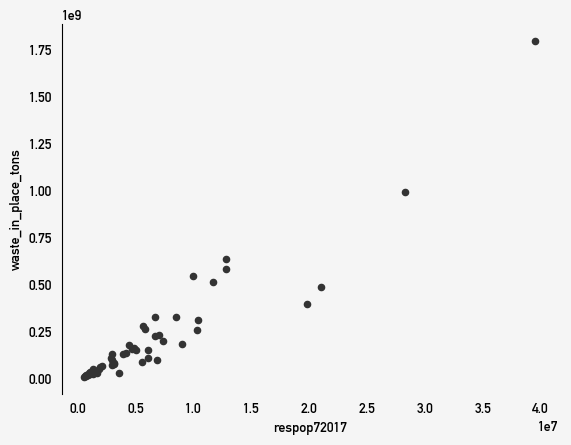

In [182]:
ax = df_big_wide.plot(kind='scatter', x='respop72017', y='waste_in_place_tons')
ax.grid(b=None)

plt.rcParams.update({
    'axes.spines.bottom' : True
})

In [ ]:
df_big_wide.plot(kind='barh')

In [ ]:
df_big_wide.plot(kind='scatter', x='respop72017', y='waste_in_place_tons')

In [21]:
df_big_wide.head()

,State,waste_in_place_tons,respop72017
0,Alabama,1.631710e+08,4874747
1,Alaska,2.081570e+07,739795
2,Arizona,2.306626e+08,7016270
3,Arkansas,7.066170e+07,3004279
4,California,1.795816e+09,39536653


In [22]:
df.head()

,objectid,category,ghgrp_id,landfill_name,county_state,landfill_owner_org,year_landfill_opened,landfill_closure_year,current_landfill_status,landfill_design_cap,waste_in_place_tons,waste_in_place_year,lfg_collection_system,lfg_collected_mmscfd,lfg_collected_year,latitude,longitude,Abbreviation
0,1,With Project,1007341.0,Anchorage Regional Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1987.0,2043.0,Open,27104639.0,9124649.0,2016.0,Yes,2.95,2013.0,61.293281,-149.602138,AK
1,2,Other,1010389.0,Capitol Disposal Landfill,"Juneau, AK","Waste Management, Inc.",1965.0,2038.0,Open,2468607.0,834318.0,2016.0,Yes,0.14,NaN,58.352800,-134.494700,AK
2,3,Candidate,1011448.0,Central Landfill - MatSu Borough,"Matanuska-Susitna, AK",Matanuska-Susitna Borough,1980.0,2164.0,Open,41974220.0,1706487.0,2016.0,Unknown,NaN,NaN,61.590000,-149.210000,AK
3,4,Candidate,1005349.0,Central Peninsula Landfill (CPL),"Kenai Peninsula, AK",Kenai Peninsula Borough,1969.0,2042.0,Open,2703698.0,1551618.0,2016.0,No,NaN,NaN,60.447140,-151.103690,AK
4,5,Other,NaN,Kodiak Island Borough Landfill,"Kodiak Island, AK",Kodiak Island Borough,NaN,2014.0,Closed,NaN,228688.0,2007.0,No,NaN,NaN,57.808740,-152.407610,AK


In [159]:
df_timeseries = df

In [160]:
df_timeseries.dropna(subset=['year_landfill_opened'], inplace=True)
df_timeseries.year_landfill_opened = df_timeseries.year_landfill_opened.astype(int)
df_timeseries.head()

,objectid,category,ghgrp_id,landfill_name,county_state,landfill_owner_org,year_landfill_opened,landfill_closure_year,current_landfill_status,landfill_design_cap,waste_in_place_tons,waste_in_place_year,lfg_collection_system,lfg_collected_mmscfd,lfg_collected_year,latitude,longitude,Abbreviation
0,1,With Project,1007341.0,Anchorage Regional Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1987,2043.0,Open,27104639.0,9124649.0,2016.0,Yes,2.950,2013.0,61.293281,-149.602138,AK
1,2,Other,1010389.0,Capitol Disposal Landfill,"Juneau, AK","Waste Management, Inc.",1965,2038.0,Open,2468607.0,834318.0,2016.0,Yes,0.140,NaN,58.352800,-134.494700,AK
2,3,Candidate,1011448.0,Central Landfill - MatSu Borough,"Matanuska-Susitna, AK",Matanuska-Susitna Borough,1980,2164.0,Open,41974220.0,1706487.0,2016.0,Unknown,NaN,NaN,61.590000,-149.210000,AK
3,4,Candidate,1005349.0,Central Peninsula Landfill (CPL),"Kenai Peninsula, AK",Kenai Peninsula Borough,1969,2042.0,Open,2703698.0,1551618.0,2016.0,No,NaN,NaN,60.447140,-151.103690,AK
5,6,Other,1004380.0,Merrill Field Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1960,1987.0,Closed,3295353.0,3295353.0,1987.0,Yes,0.263,2012.0,61.212660,-149.840120,AK


In [161]:
df_timeseries['year'] = pd.to_datetime(df_timeseries['year_landfill_opened'], format="%Y")
df.head()

,objectid,category,ghgrp_id,landfill_name,county_state,landfill_owner_org,year_landfill_opened,landfill_closure_year,current_landfill_status,landfill_design_cap,waste_in_place_tons,waste_in_place_year,lfg_collection_system,lfg_collected_mmscfd,lfg_collected_year,latitude,longitude,Abbreviation,year
0,1,With Project,1007341.0,Anchorage Regional Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1987,2043.0,Open,27104639.0,9124649.0,2016.0,Yes,2.950,2013.0,61.293281,-149.602138,AK,1987-01-01
1,2,Other,1010389.0,Capitol Disposal Landfill,"Juneau, AK","Waste Management, Inc.",1965,2038.0,Open,2468607.0,834318.0,2016.0,Yes,0.140,NaN,58.352800,-134.494700,AK,1965-01-01
2,3,Candidate,1011448.0,Central Landfill - MatSu Borough,"Matanuska-Susitna, AK",Matanuska-Susitna Borough,1980,2164.0,Open,41974220.0,1706487.0,2016.0,Unknown,NaN,NaN,61.590000,-149.210000,AK,1980-01-01
3,4,Candidate,1005349.0,Central Peninsula Landfill (CPL),"Kenai Peninsula, AK",Kenai Peninsula Borough,1969,2042.0,Open,2703698.0,1551618.0,2016.0,No,NaN,NaN,60.447140,-151.103690,AK,1969-01-01
5,6,Other,1004380.0,Merrill Field Landfill,"Anchorage, AK","Municipality of Anchorage, AK",1960,1987.0,Closed,3295353.0,3295353.0,1987.0,Yes,0.263,2012.0,61.212660,-149.840120,AK,1960-01-01


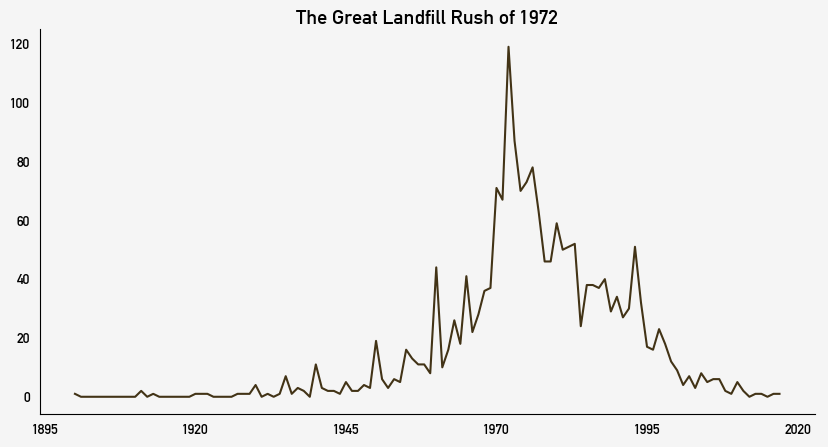

In [223]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = df_timeseries.resample('A', on='year').count().year.plot(figsize=(10,5), color='#423316')
#ax.grid(axis='x')
ax.set_xlabel('')

plt.rcParams.update({
    'axes.spines.left' : True,
    'axes.spines.bottom' : True,
    'axes.grid' : False
})
ax.set_title('The Great Landfill Rush of 1972')

plt.savefig("great-landfill-rush.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
plt.savefig("great-landfill-rush.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

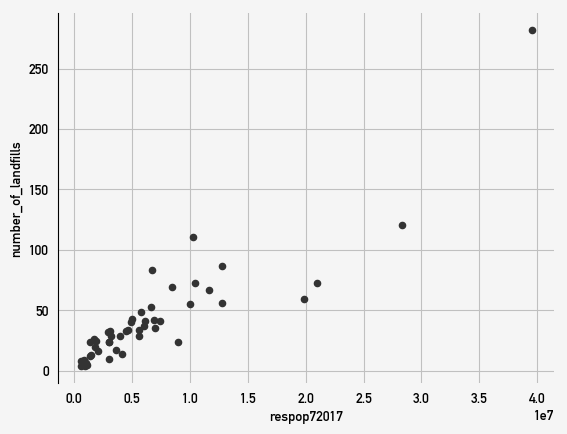

In [47]:
df_big_wide.plot(kind='scatter', x='respop72017', y='number_of_landfills')

In [62]:
df_big.waste_in_place_tons = df_big.waste_in_place_tons.astype(int)

In [74]:
df_big_wide['garbage_tons_per_capita'] = df_big_wide.waste_in_place_tons / df_big_wide.respop72017
df_big_wide.head()

,State,waste_in_place_tons,respop72017,Abbreviation,number_of_landfills,garbage_tons_per_capita
0,Alabama,1.631710e+08,4874747,AL,40,33.472717
1,Alaska,2.081570e+07,739795,AK,8,28.137118
2,Arizona,2.306626e+08,7016270,AZ,35,32.875382
3,Arkansas,7.066170e+07,3004279,AR,24,23.520353
4,California,1.795816e+09,39536653,CA,282,45.421547


In [127]:
reset = df_big_wide.reset_index

In [128]:
reset = df_big_wide.set_index('State')

In [129]:
reset.sort_values(by='garbage_tons_per_capita', inplace=True, ascending=False)
reset.head()

,waste_in_place_tons,respop72017,Abbreviation,number_of_landfills,garbage_tons_per_capita
State,,,,,
Michigan,548445464.0,9962311,MI,55,55.052032
Pennsylvania,637348187.0,12805537,PA,56,49.771297
Colorado,278015565.0,5607154,CO,34,49.582295
Indiana,325364265.0,6666818,IN,53,48.803532
Wisconsin,264612544.0,5795483,WI,49,45.658411


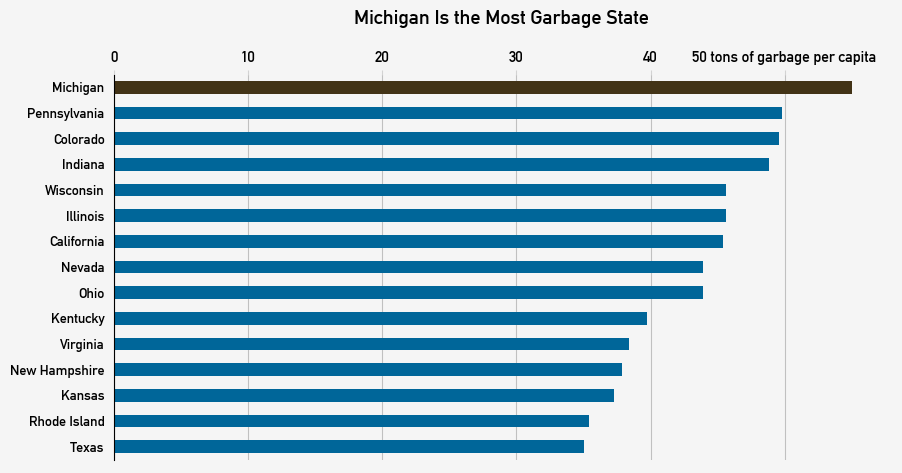

In [211]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = reset.garbage_tons_per_capita.head(15).sort_values(ascending=True).plot(kind='barh', y='State', color=['#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#423316'], figsize=(10,5))

ax.set_title('Michigan Is the Most Garbage State', pad=40, va='center')
ax.xaxis.set_ticks_position('top')
ax.grid(axis='y')
ax.tick_params(color='lightgrey')

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(labels = ['0', '10', '20', '30', '40', '50 tons of garbage per capita'], fontdict={'size':11})

plt.savefig("michigan-is-garbage.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
plt.savefig("michigan-is-garbage.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

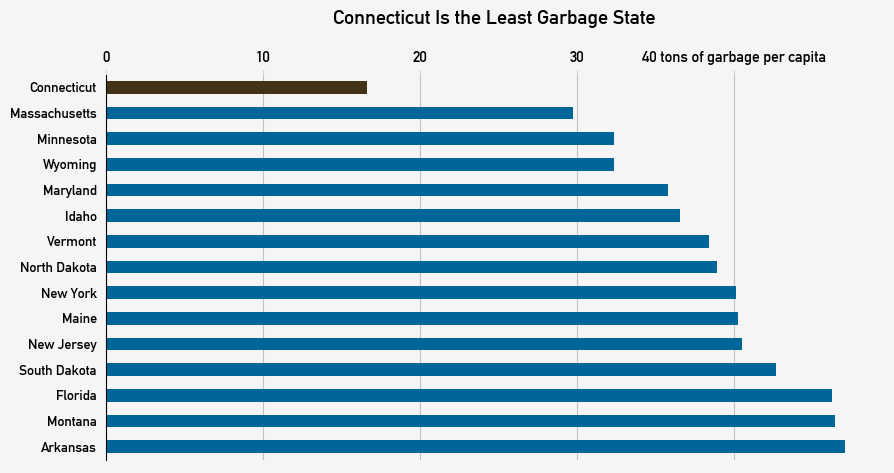

In [212]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = reset.garbage_tons_per_capita.tail(15).sort_values(ascending=False).plot(kind='barh', y='State', color=['#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#006699', '#423316'], figsize=(10,5))

ax.set_title('Connecticut Is the Least Garbage State', pad=40, va='center')
ax.xaxis.set_ticks_position('top')
ax.grid(axis='y')
ax.tick_params(color='lightgrey')

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(labels = ['0', '10', '20', '30', '40 tons of garbage per capita'], fontdict={'size':11})

plt.savefig("connecticut-is-not-garbage.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
plt.savefig("connecticut-is-not-garbage.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

In [229]:
df_big_wide['poverty_rate'] = df_census['Poverty_Rate']
df_big_wide.head()

,State,waste_in_place_tons,respop72017,Abbreviation,number_of_landfills,garbage_tons_per_capita,poverty_rate
0,Alabama,1.631710e+08,4874747,AL,40,33.472717,16.3
1,Alaska,2.081570e+07,739795,AK,8,28.137118,10.9
2,Arizona,2.306626e+08,7016270,AZ,35,32.875382,16.6
3,Arkansas,7.066170e+07,3004279,AR,24,23.520353,16.1
4,California,1.795816e+09,39536653,CA,282,45.421547,13.9


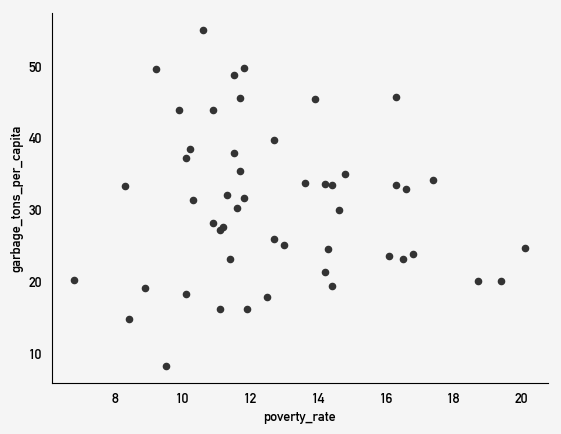

In [233]:
df_big_wide.plot(kind='scatter', x='poverty_rate', y='garbage_tons_per_capita')